### Imports

In [1]:
import os
import numpy as np
import geopandas as gpd
import pandas as pd
import shutil
import cv2
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.model_selection import train_test_split
from tqdm import tqdm


### All SVs

In [2]:
all_svs = pd.read_csv("/home/hanxli/data/data/all_label_images_filtered_reclasses.csv")

In [3]:
all_svs

,img_name,timestamp,crop_type,save_path,geometry
0,IMG_2022_001.jpg,2022-08-09 13:54:08,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134842.93178947328 1983715.3378369794)
1,IMG_2022_003.jpg,2022-08-09 13:54:20,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134401.7644465734 1983428.4774710557)
2,IMG_2022_004.jpg,2022-08-09 14:48:06,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134291.47027611607 1983356.61060757)
3,IMG_2022_006.jpg,2022-08-09 14:48:09,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-133973.18187298582 1983151.1873832878)
4,IMG_2022_007.jpg,2022-08-09 13:55:58,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-133639.8767866358 1981696.371061486)
...,...,...,...,...,...
5450,IMG_2021_4570.jpg,2021-07-15 12:00:00,Wheat,/home/hanxli/data/data/all_sv_imgs/IMG_2021_45...,POINT (5332304.897539199 6413964.014993543)
5451,IMG_2021_4571.jpg,2021-06-15 12:00:00,Wheat,/home/hanxli/data/data/all_sv_imgs/IMG_2021_45...,POINT (5562716.99987056 6361439.702001621)
5452,IMG_2021_4572.jpg,2021-08-15 12:00:00,Wheat,/home/hanxli/data/data/all_sv_imgs/IMG_2021_45...,POINT (5487568.872962037 6375263.467579143)
5453,IMG_2021_4573.jpg,2021-05-15 12:00:00,Wheat,/home/hanxli/data/data/all_sv_imgs/IMG_2021_45...,POINT (5404693.707021068 6403138.154097698)


In [4]:
np.unique(all_svs.crop_type)

array(['Maize', 'Other', 'Rice', 'Soybean', 'Sugarcane', 'Wheat'],
      dtype=object)

### Split DF into Train Test

In [5]:
train_df, test_df = train_test_split(all_svs, test_size=0.2, random_state=42)

In [6]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [7]:
train_df.head()

,img_name,timestamp,crop_type,save_path,geometry
0,IMG_2021_4166.jpg,2021-07-15 12:00:00,Wheat,/home/hanxli/data/data/all_sv_imgs/IMG_2021_41...,POINT (6376787.3276050575 11335984.784758545)
1,IMG_2021_0161.jpg,2021-06-15 12:00:00,Wheat,/home/hanxli/data/data/all_sv_imgs/IMG_2021_01...,POINT (6234318.203501569 7097049.4345168695)
2,IMG_2021_2824.jpg,2021-03-15 12:00:00,Rice,/home/hanxli/data/data/all_sv_imgs/IMG_2021_28...,POINT (-12503792.870588327 9344924.511169052)
3,IMG_2021_1591.jpg,2021-12-15 12:00:00,Sugarcane,/home/hanxli/data/data/all_sv_imgs/IMG_2021_15...,POINT (6463140.123798289 -2701816.1300258557)
4,IMG_2021_1712.jpg,2021-12-15 12:00:00,Sugarcane,/home/hanxli/data/data/all_sv_imgs/IMG_2021_17...,POINT (6665902.514492665 -2671492.593743851)


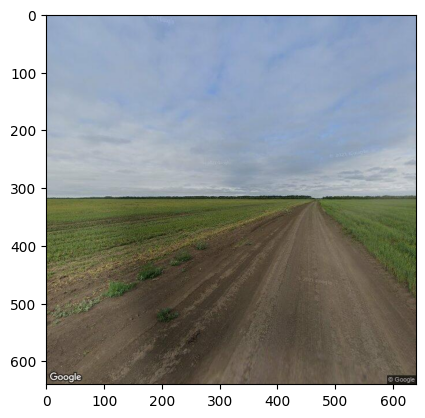

In [9]:
image = cv2.imread(train_df.loc[0,"save_path"])
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [10]:
len("IMG_2021_4166.jpg".split("_")[2])

8

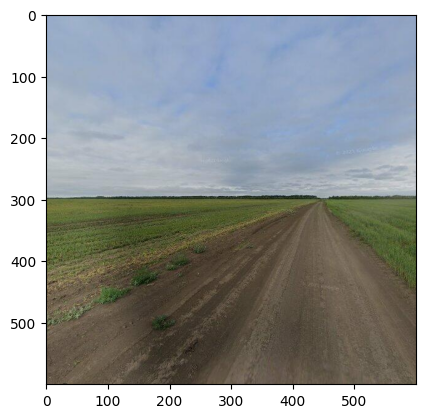

In [11]:
plt.imshow(im_rgb[20:620, 20:620])

In [12]:
im_rgb[20:620, 20:620].shape

(600, 600, 3)

In [ ]:
train_df

### Split and save images

In [8]:
def split_and_save(df, path, targets=None):
    temp_dict = []

    for i in tqdm(range(len(df))):
        if targets:
            if df.loc[i, "crop_type"] in targets:
                ori_path = df.loc[i, "save_path"]
                name = df.loc[i, "img_name"].split(".")
                if len(df.loc[i, "img_name"].split("_")[2]) != 8:
                    new_names = [f"{name[0]}_0.{name[1]}", f"{name[0]}_1.{name[1]}"]
                    img = cv2.imread(ori_path)
                    sub_img_0 = cv2.resize(img[500:2500, 16:2016], (224, 224), interpolation= cv2.INTER_LINEAR)
                    img_0_path = os.path.join(path, new_names[0])
                    sub_img_1 = cv2.resize(img[500:2500, 2016:4016], (224, 224), interpolation= cv2.INTER_LINEAR)
                    img_1_path = os.path.join(path, new_names[1])
                    if not os.path.isfile(img_0_path):
                        cv2.imwrite(img_0_path, sub_img_0)
                    temp_dict.append({"img_name":new_names[0], "crop_type": df.loc[i, "crop_type"], "save_path":img_0_path})
                    if not os.path.isfile(img_1_path):
                        cv2.imwrite(img_1_path, sub_img_1)
                    temp_dict.append({"img_name":new_names[1], "crop_type": df.loc[i, "crop_type"], "save_path":img_1_path})
                else:
                    img = cv2.imread(ori_path)
                    img = cv2.resize(img[20:620, 20:620], (224, 224), interpolation = cv2.INTER_LINEAR)
                    new_path = os.path.join(path, df.loc[i, "img_name"])
                    cv2.imwrite(new_path, img)
                    temp_dict.append({"img_name":df.loc[i, "img_name"], "crop_type": df.loc[i, "crop_type"], "save_path":new_path})
    return pd.DataFrame(temp_dict)



In [9]:
train_data = split_and_save(train_df, "/home/hanxli/data/data/all_training_svs_3class", ["Maize", "Soybean"])

100%|██████████| 4364/4364 [09:43<00:00,  7.49it/s]


In [25]:
others_list_train = []
for i in range(len(train_df)):
    if train_df.loc[i, "img_name"].split("_")[1] != "2021":
        others_list_train.append(train_df.loc[i])
temp = pd.DataFrame(others_list_train)
temp = temp.reset_index(drop=True)
temp

In [28]:
train_data_other = split_and_save(temp, "/home/hanxli/data/data/all_training_svs_3class", ["Other"])

100%|██████████| 690/690 [00:45<00:00, 15.03it/s]


In [10]:
test_data = split_and_save(test_df,  "/home/hanxli/data/data/all_validation_svs_3class", ["Maize", "Soybean"])

100%|██████████| 1091/1091 [01:48<00:00, 10.09it/s]


In [29]:
others_list_val = []
for i in range(len(test_df)):
    if test_df.loc[i, "img_name"].split("_")[1] != "2021":
        others_list_val.append(test_df.loc[i])
temp = pd.DataFrame(others_list_val)
temp = temp.reset_index(drop=True)
temp

,img_name,timestamp,crop_type,save_path,geometry
0,IMG_2022_040.jpg,2022-08-09 14:11:25,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_04...,POINT (-133831.2733225635 1960338.8705609846)
1,IMG_2023_341.jpg,2023-10-14 13:59:57,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2023_34...,POINT (-220269.46475629517 1980816.6111933617)
2,IMG_2022_370.jpg,2022-08-11 11:51:34,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_37...,POINT (107285.75182342107 2028681.952088454)
3,IMG_2022_090.jpg,2022-08-09 14:32:11,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_09...,POINT (-100664.31790229683 1960951.0882553912)
4,IMG_2022_095.jpg,2022-08-09 14:33:49,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_09...,POINT (-97662.59129751813 1960883.5502282898)
...,...,...,...,...,...
186,IMG_2022_252.jpg,2022-08-10 17:11:30,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_25...,POINT (-12237.806248692945 2052666.6422927864)
187,IMG_2023_268.jpg,2023-10-14 11:09:16,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2023_26...,POINT (-87996.6058183408 2022593.7300886838)
188,IMG_2023_116.jpg,2023-10-13 17:38:27,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2023_11...,POINT (-61680.12191833712 2098907.7759661837)
189,IMG_2023_026.jpg,2023-10-13 16:49:21,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2023_02...,POINT (-83286.55927370524 2153178.3030824326)


In [30]:
val_data_other = split_and_save(temp, "/home/hanxli/data/data/all_validation_svs_3class", ["Other"])

100%|██████████| 191/191 [00:16<00:00, 11.25it/s]


In [31]:
train_data = pd.concat([train_data, train_data_other]).reset_index(drop=True)
train_data

,img_name,crop_type,save_path
0,IMG_2021_3404.jpg,Maize,/home/hanxli/data/data/all_training_svs_3class...
1,IMG_2023_231_0.jpg,Soybean,/home/hanxli/data/data/all_training_svs_3class...
2,IMG_2023_231_1.jpg,Soybean,/home/hanxli/data/data/all_training_svs_3class...
3,IMG_2023_299_0.jpg,Soybean,/home/hanxli/data/data/all_training_svs_3class...
4,IMG_2023_299_1.jpg,Soybean,/home/hanxli/data/data/all_training_svs_3class...
...,...,...,...
2445,IMG_2023_120_1.jpg,Other,/home/hanxli/data/data/all_training_svs_3class...
2446,IMG_2023_555_0.jpg,Other,/home/hanxli/data/data/all_training_svs_3class...
2447,IMG_2023_555_1.jpg,Other,/home/hanxli/data/data/all_training_svs_3class...
2448,IMG_2023_439_0.jpg,Other,/home/hanxli/data/data/all_training_svs_3class...


In [32]:
train_data.to_csv("/home/hanxli/data/data/all_training_svs_3class/train_split_esa_csiss.csv", sep=",")

In [33]:
test_data = pd.concat([test_data, val_data_other]).reset_index(drop=True)
test_data

,img_name,crop_type,save_path
0,IMG_2021_4266.jpg,Maize,/home/hanxli/data/data/all_validation_svs_3cla...
1,IMG_2021_2370.jpg,Soybean,/home/hanxli/data/data/all_validation_svs_3cla...
2,IMG_2021_0634.jpg,Maize,/home/hanxli/data/data/all_validation_svs_3cla...
3,IMG_2022_040_0.jpg,Soybean,/home/hanxli/data/data/all_validation_svs_3cla...
4,IMG_2022_040_1.jpg,Soybean,/home/hanxli/data/data/all_validation_svs_3cla...
...,...,...,...
653,IMG_2022_198_1.jpg,Other,/home/hanxli/data/data/all_validation_svs_3cla...
654,IMG_2023_507_0.jpg,Other,/home/hanxli/data/data/all_validation_svs_3cla...
655,IMG_2023_507_1.jpg,Other,/home/hanxli/data/data/all_validation_svs_3cla...
656,IMG_2023_427_0.jpg,Other,/home/hanxli/data/data/all_validation_svs_3cla...


In [34]:
test_data.to_csv("/home/hanxli/data/data/all_validation_svs_3class/val_split_esa_csiss.csv", sep=",")


### Compute Mean and Std of Train and Val dataset

In [35]:
import os
from PIL import Image
from tqdm import tqdm

In [21]:
img_data = Image.open("/home/hanxli/data/data/csiss_sv_training/IMG_2022_001_0.jpg")

In [22]:
np.array(img_data).mean(axis=(0,1))

array([ 72.50334821, 131.68672274, 110.83753189])

In [36]:
def calc_mean_std(folder_path):

    mean = np.zeros(3)
    std = np.zeros(3)
    img_count = 0


    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            img_data = np.array(Image.open(img_path).convert("RGB"))
            img_array = img_data.astype(np.float32) / 255.0

            mean += img_array.mean(axis = (0, 1))
            std += img_array.std(axis = (0, 1))
            img_count += 1
    means = mean / img_count
    stds = std / img_count

    return means, stds


In [37]:
train_mean, train_stds = calc_mean_std("/home/hanxli/data/data/all_training_svs_3class")

  0%|          | 0/2451 [00:00<?, ?it/s]

100%|██████████| 2451/2451 [00:22<00:00, 107.76it/s]


In [38]:
print(train_mean, train_stds)

[0.50614358 0.57798129 0.53686056] [0.1789791  0.20435749 0.27934631]


In [39]:
val_mean, val_stds = calc_mean_std("/home/hanxli/data/data/all_validation_svs_3class")
print(val_mean, val_stds)

100%|██████████| 659/659 [00:06<00:00, 103.88it/s]

[0.49846566 0.57426037 0.53141111] [0.17893861 0.20375895 0.28002261]
